In [1]:
#Extract data by SQL

#Write a SQL query to extract the city level data.

"""with t1 as
(select *
from city_list
where country in ('Finland')
 )
select year year1, avg_temp avg_temp, c.city city
from city_data c
join t1 
on t1.city = c.city
order by 1
"""

#Export to CSV
"""helsinki_data.csv"""


#Write a SQL query to extract the global data. 

"""select *
   from global_data
   order by 1
"""

#Export to CSV
"""global_data.csv"""

'global_data.csv'

In [2]:
#Import CVS file to pandas dataframe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [4]:
global_data= pd.read_csv('global_data.csv')
helsinki_data = pd.read_csv('helsinki_data.csv')


#show 10 first rows of two data files.

print(global_data.head(10), '\n')
print(helsinki_data.head(10))


   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99 

   year1  avg_temp      city
0   1743      1.55  Helsinki
1   1744      6.32  Helsinki
2   1745     -5.95  Helsinki
3   1746       NaN  Helsinki
4   1747       NaN  Helsinki
5   1748       NaN  Helsinki
6   1749       NaN  Helsinki
7   1750      5.14  Helsinki
8   1751      4.68  Helsinki
9   1752     -0.29  Helsinki


In [5]:
# Check data to see if we have NaN values

print(global_data.info(), '\n')
print(helsinki_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year1     271 non-null    int64  
 1   avg_temp  267 non-null    float64
 2   city      271 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None


In [6]:
print(global_data.avg_temp.describe(), '\n')
print(helsinki_data.avg_temp.describe())

count    266.000000
mean       8.369474
std        0.584747
min        5.780000
25%        8.082500
50%        8.375000
75%        8.707500
max        9.830000
Name: avg_temp, dtype: float64 

count    267.000000
mean       4.244195
std        1.239771
min       -5.950000
25%        3.575000
50%        4.250000
75%        5.025000
max        6.770000
Name: avg_temp, dtype: float64


In [7]:
#fill NaN values with the following below value, because it would reflect true values of these NaN cells.

helsinki_data_new = helsinki_data.fillna(method = 'backfill', axis =0)
print(helsinki_data_new)

     year1  avg_temp      city
0     1743      1.55  Helsinki
1     1744      6.32  Helsinki
2     1745     -5.95  Helsinki
3     1746      5.14  Helsinki
4     1747      5.14  Helsinki
..     ...       ...       ...
266   2009      5.49  Helsinki
267   2010      4.36  Helsinki
268   2011      6.38  Helsinki
269   2012      5.12  Helsinki
270   2013      6.17  Helsinki

[271 rows x 3 columns]


In [8]:
#Calculate Moving Average, we get average of 30 first avg_temp to set Moving average value for value in row 29. .

global_data['Moving Average']= global_data ['avg_temp'].rolling(30).mean()
global_data.head(10)

,year,avg_temp,Moving Average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,NaN


In [9]:
#Calculate Moving Average, we get average of 30 first avg_temp to set Moving average value for value in row 29. .

helsinki_data_new['Moving Average']= helsinki_data_new['avg_temp'].rolling(30).mean()
helsinki_data_new.head(10)

,year1,avg_temp,city,Moving Average
0,1743,1.55,Helsinki,NaN
1,1744,6.32,Helsinki,NaN
2,1745,-5.95,Helsinki,NaN
3,1746,5.14,Helsinki,NaN
4,1747,5.14,Helsinki,NaN
5,1748,5.14,Helsinki,NaN
6,1749,5.14,Helsinki,NaN
7,1750,5.14,Helsinki,NaN
8,1751,4.68,Helsinki,NaN
9,1752,-0.29,Helsinki,NaN


(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

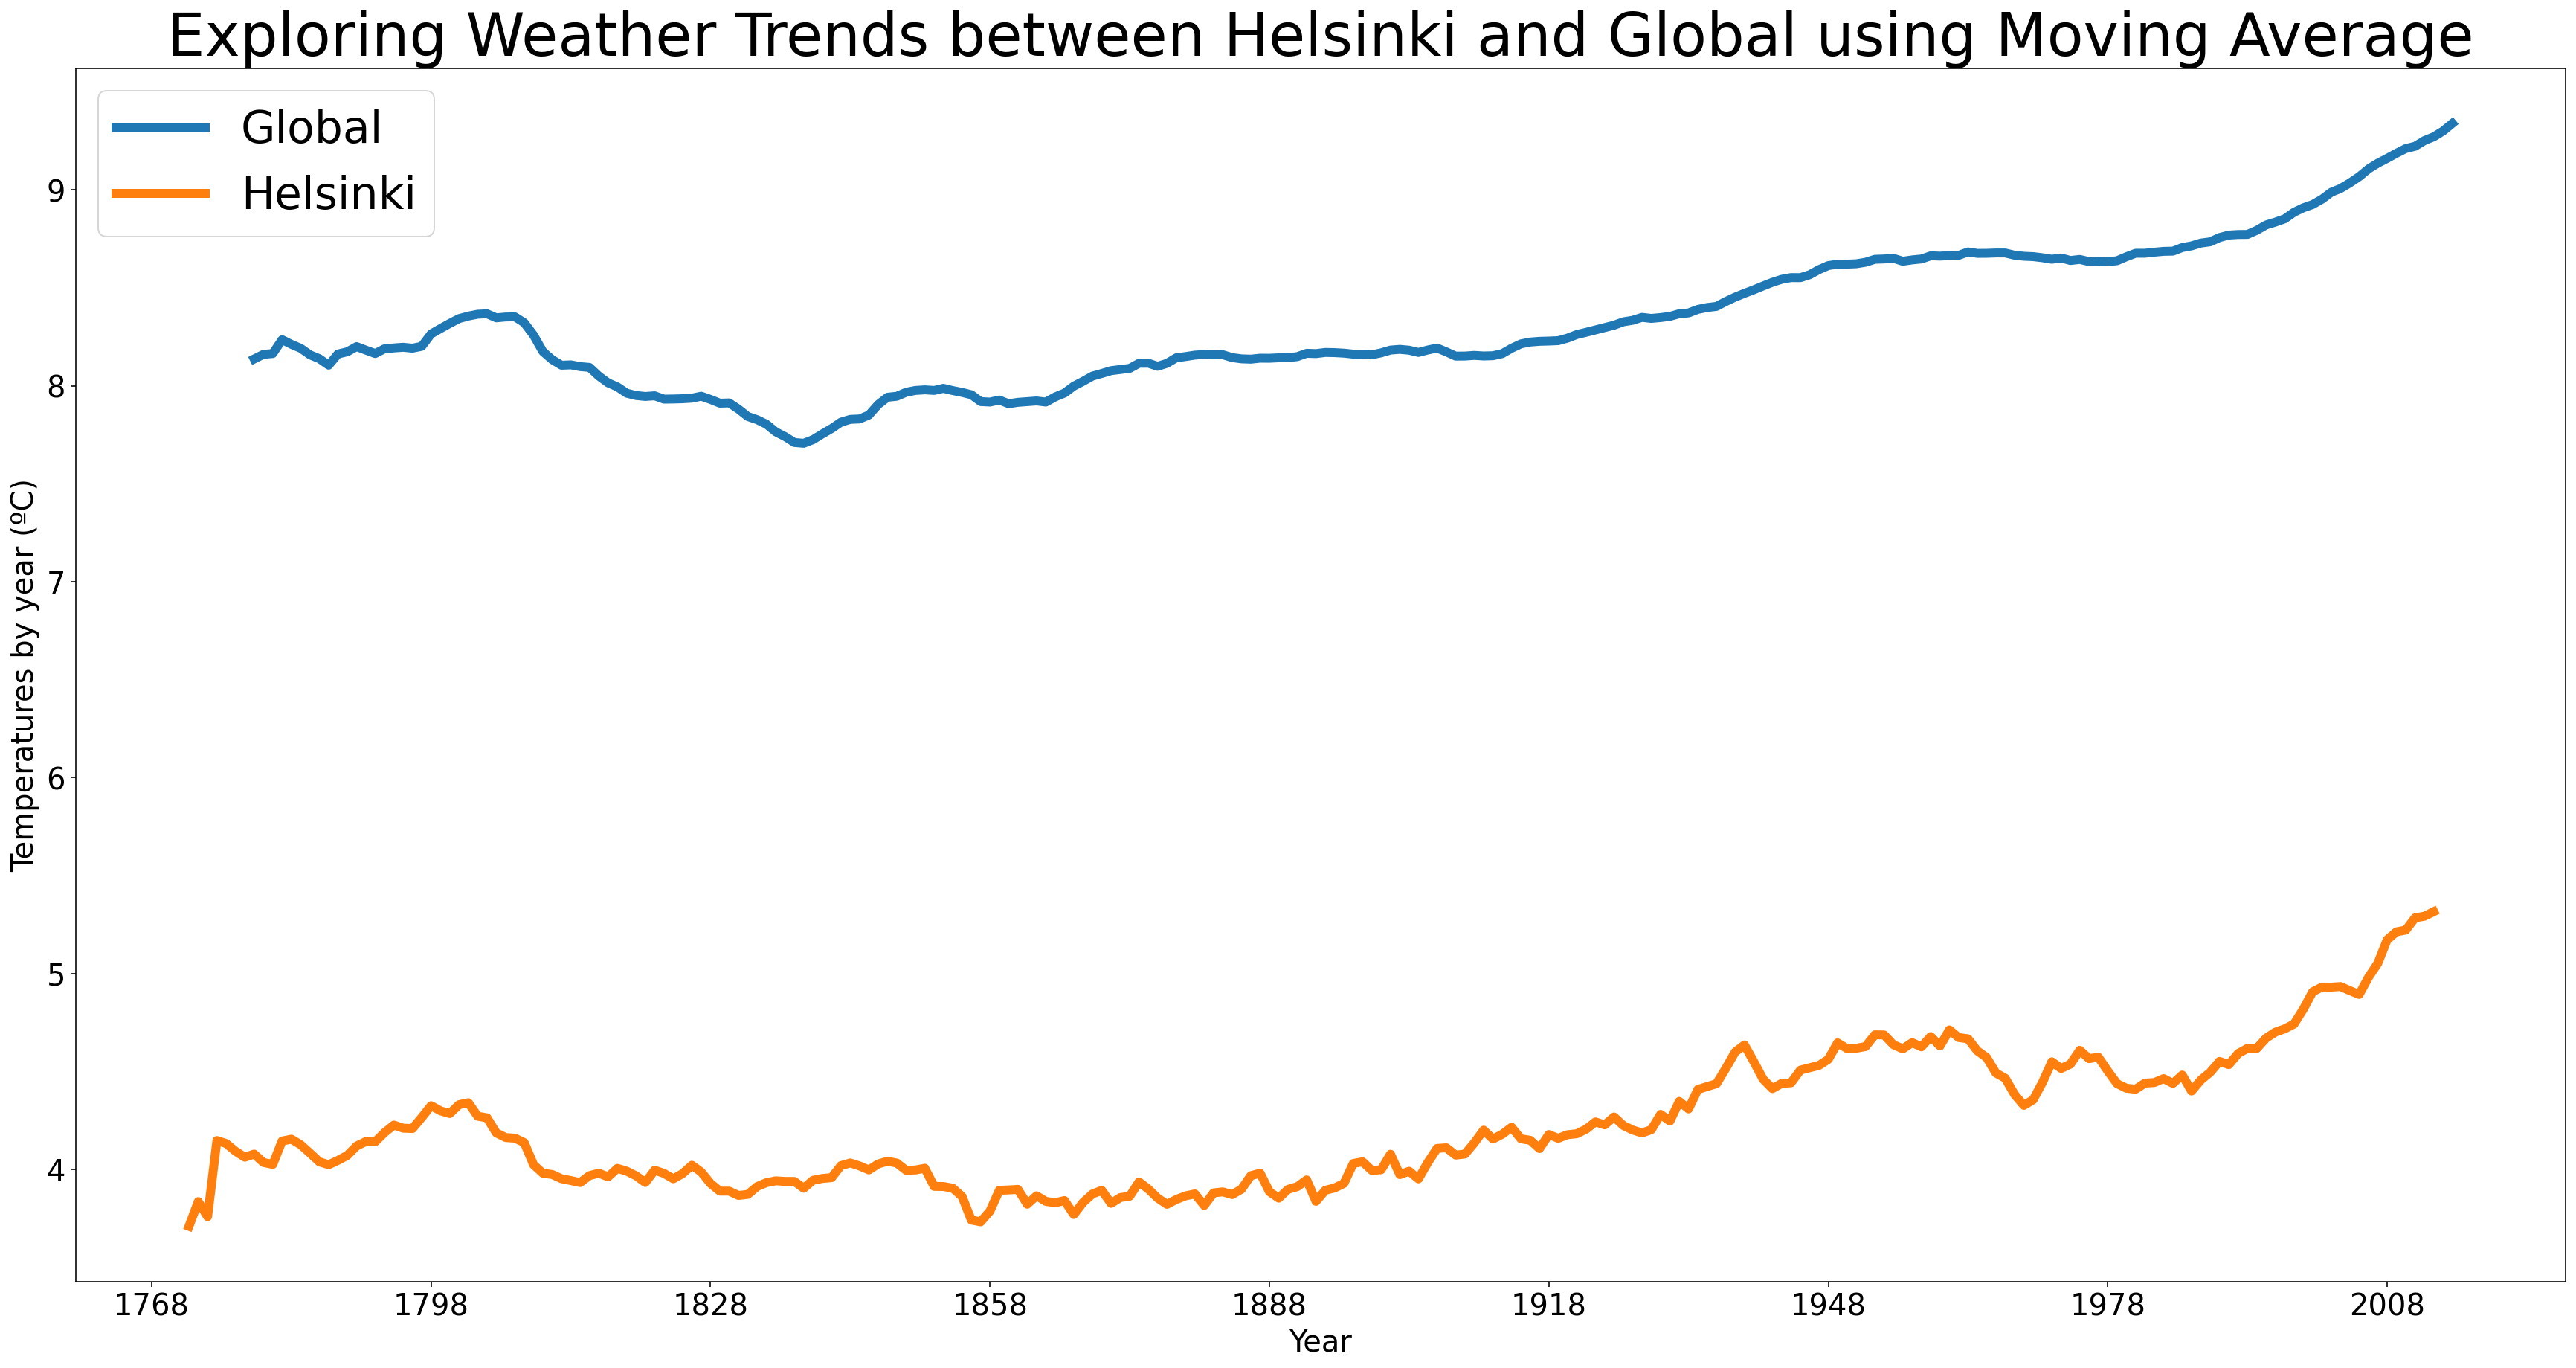

In [10]:
#Create line chart with Moving Average

plt.figure(figsize=(30,15))
plt.plot(global_data['year'],global_data['Moving Average'], linewidth=6)
plt.plot(helsinki_data_new['year1'],helsinki_data_new['Moving Average'], linewidth=6)
plt.legend(["Global", "Helsinki"], fontsize=30)
plt.title ('Exploring Weather Trends between Helsinki and Global using Moving Average', fontsize=40)
plt.xlabel ('Year', fontsize=20)
plt.ylabel ('Temperatures by year (ºC)', fontsize=20)
plt.xticks(np.arange(1768, 2015, step=30),fontsize=20 )
plt.yticks (fontsize=20)

In [11]:
import scipy.stats
print(scipy.stats.pearsonr(global_data['year'], global_data['avg_temp']))

print(scipy.stats.pearsonr(helsinki_data_new['year1'], helsinki_data_new['avg_temp']))



(0.6227745062665122, 5.744760259840348e-30)
(0.31499870186001966, 1.1770607072220968e-07)


In [26]:
avg_global= global_data['avg_temp'].mean() 
avg_hel = helsinki_data_new['avg_temp'].mean() 

print('average global temp is : \t\t\t', avg_global)
print('average hel temp is : \t \t\t\t', avg_hel)
print('average difference in temp between two data : \t', avg_global- avg_hel)

average global temp is : 			 8.36947368421053
average hel temp is : 	 			 4.257416974169742
average difference in temp between two data : 	 4.112056710040787


#Make observations

"""
1. Is your city hotter or cooler on average compared to the global average?
Has the difference been consistent over time?

Helsinki is always colder on average as compared to the global average. (about 4.11ºC temperature colder than global)
As we can see in the chart, Helsinki line is far lower than global line. 
It means Helsinki is always colder than global in general and the difference is consistent over time. 


2. How do the changes in your city’s temperatures over time compare to the changes in the global average?


Helsinki line fluctuates much more than global line means Helsinki's temperature is not stable from year to year as compared to global trend.


3. What does the overall trend look like? 
Is the world getting hotter or cooler? 
Has the trend been consistent over the last few hundred years?


Overall, both two lines go up. It means the world is getting hotter.
The trend has been consistent over the last few hundred years.

4. Pearson correlation coefficient of year and avg_temp.

The Pearson correlation coefficient between year and avg_temp of Global data is 0.62
The Pearson correlation coefficient between year and avg_temp of Helsinki data is 0.31

It indicates that there is a positive relationship between average temperature and time
in both global and Helsinki. The temperature is escalated over time for global and Helsinki.

Both Pearson correlation coefficient values are below 0.7, means the relationship between average temperature and time is not so strong for both 
Global and Helsinki.The average temperature increase moderately, not so dramatically.


"""